<a href="https://colab.research.google.com/github/microprediction/winningnotebooks/blob/main/Ability_Transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install winning
!pip install pandas
!pip install scipy
!pip install nevergrad
from winning.skew_calibration import skew_dividend_implied_ability, skew_ability_implied_dividends
import numpy as np
import pylab
import scipy.stats as stats
import pandas as pd
from winning.skew_calibration import skew_dividend_implied_ability, skew_ability_implied_dividends, state_price_implied_ability
import numpy as np
import pylab
from winning.lattice import center_density, skew_normal_density
from winning.lattice_conventions import ALT_UNIT, ALT_L, ALT_SCALE, ALT_A
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import norm
import math



  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.7/495.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.5/283.5 kB 9.4 MB/s eta 0:00:00
  Created wheel for directsearch: filename=directsearch-1.0-py3-none-any.whl size=16297 sha256=615a6486673f3b298e266cc85ea95476ac4fbb35535fc3e06cddb9fa32e3e940
  Stored in directory: /root/.cache/pip/wheels/93/de/c0/ff1d2db2e4c2fcc4bb1f72ae2672860872d3bc42ea00bd1f4e
Successfully built directsearch


# Some empirical ability transforms - just for fun

In [2]:

def normalize(x):
  x_sum = np.sum(x)
  return [xi/x_sum for xi in x]

def standardize(x):
    xc = [xi-np.mean(x) for xi in x]
    xs = [xci/np.std(xc) for xci in xc ]
    return xs

def ability_transform(x,a,cull=1):
    sx = list(reversed(sorted(x)))
    nzx = [ x_ for x_ in sx if x_>0 ][cull:-cull]  # Chop highest and lowest
    z = normalize(nzx)
    zt = [ max(zi,0.00000000005) for zi in z] # Instability - need to look into this or increase lattice
    density = skew_normal_density(L=2*ALT_L, unit=ALT_UNIT, loc=0., scale=ALT_SCALE, a=a)
    ability = state_price_implied_ability(prices=zt, density=density)
    return standardize(ability)

def proximity(x,a):
    sa = ability_transform(x,a)
    cdfs = [ stats.norm.cdf(sai) for sai in sa ]
    n = len(cdfs)
    std_cdfs = np.linspace(1/(n+1),1-1/(n+1),n)
    return np.mean([ abs(c1-c2) for c1,c2 in zip(sorted(cdfs),std_cdfs)])

def ability_fit(x):
    """
       Finds the skew best matching the distribution
    """
    def objective(a):
      return proximity(x,a)

    result = minimize(objective, x0=[0], bounds=[(-3,3)],options={'maxiter':100})
    best_a = result.x.tolist()[0]

    return best_a

def ability_plot(x,a=0.0,cull=1,title=None):
   y = ability_transform(x,a,cull=1)
   f = stats.probplot(y, dist="norm", plot=pylab)
   if title is None:
     plt.title('a='+str(a))
   else:
     plt.title(title)
   pylab.show()
   return f


def manual_search(x):
   ajs = list(np.linspace(-4,4,50))
   prox = [proximity(x,aj) for aj in ajs ]
   plt.plot(ajs,prox)


# Market cap

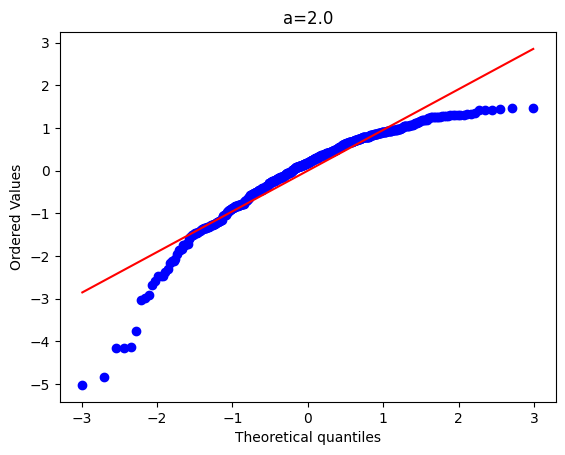

((array([-2.99148779, -2.70949569, -2.55092824, -2.43849088, -2.35038866,
         -2.27745777, -2.21494281, -2.16004641, -2.11097846, -2.06652166,
         -2.02580925, -1.98820138, -1.95321175, -1.92046179, -1.88965077,
         -1.86053573, -1.83291741, -1.8066303 , -1.7815354 , -1.75751472,
         -1.73446731, -1.71230602, -1.69095513, -1.67034836, -1.65042742,
         -1.63114071, -1.61244233, -1.5942913 , -1.57665082, -1.55948776,
         -1.54277217, -1.52647685, -1.51057708, -1.49505026, -1.47987574,
         -1.46503453, -1.45050917, -1.43628356, -1.42234281, -1.40867313,
         -1.39526172, -1.38209668, -1.36916692, -1.35646209, -1.34397251,
         -1.33168913, -1.31960346, -1.30770751, -1.2959938 , -1.28445526,
         -1.27308524, -1.26187747, -1.250826  , -1.23992522, -1.22916982,
         -1.21855477, -1.20807526, -1.19772678, -1.187505  , -1.17740581,
         -1.1674253 , -1.15755974, -1.14780558, -1.13815942, -1.12861802,
         -1.11917828, -1.10983722, -1.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/datasets/s-and-p-500-companies-financials/master/data/constituents-financials.csv')
ability_plot(df['Market Cap'].values,a=2.0)

# Snooker prizemoney

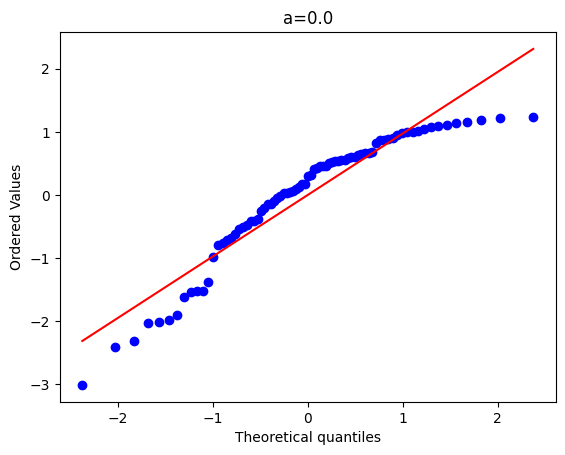

((array([-2.37663702, -2.02958204, -1.82767017, -1.68081377, -1.5632274 ,
         -1.46398099, -1.37736584, -1.30000518, -1.22972736, -1.16504879,
         -1.10490843, -1.04851956, -0.99528161, -0.94472489, -0.89647454,
         -0.8502261 , -0.80572849, -0.76277189, -0.72117887, -0.68079772,
         -0.64149747, -0.60316407, -0.5656973 , -0.52900844, -0.49301835,
         -0.45765594, -0.4228569 , -0.38856265, -0.35471952, -0.32127797,
         -0.288192  , -0.25541861, -0.22291736, -0.19064996, -0.15857989,
         -0.12667214, -0.09489286, -0.06320916, -0.0315888 ,  0.        ,
          0.0315888 ,  0.06320916,  0.09489286,  0.12667214,  0.15857989,
          0.19064996,  0.22291736,  0.25541861,  0.288192  ,  0.32127797,
          0.35471952,  0.38856265,  0.4228569 ,  0.45765594,  0.49301835,
          0.52900844,  0.5656973 ,  0.60316407,  0.64149747,  0.68079772,
          0.72117887,  0.76277189,  0.80572849,  0.8502261 ,  0.89647454,
          0.94472489,  0.99528161,  1.

In [4]:
snooker = pd.read_csv('https://raw.githubusercontent.com/rafaluk/snooker_prizes/master/snooker_data.csv',sep=';')
vals=snooker['Money_Prizes'].values
ability_plot(vals,a=0.)

# Power Law

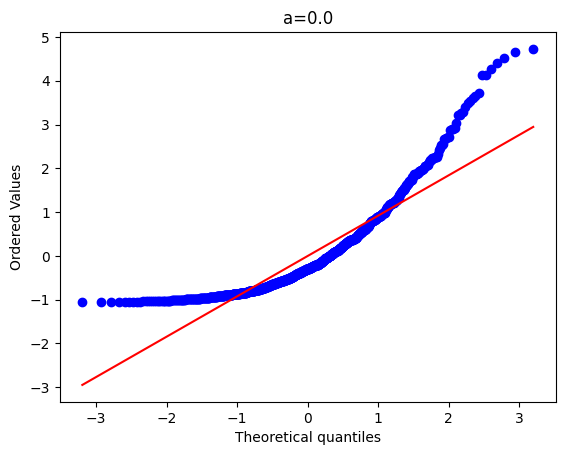

((array([-3.19701226e+00, -2.93175634e+00, -2.78372931e+00, -2.67932563e+00,
         -2.59787231e+00, -2.53069705e+00, -2.47330757e+00, -2.42306523e+00,
         -2.37828370e+00, -2.33781757e+00, -2.30085216e+00, -2.26678661e+00,
         -2.23516467e+00, -2.20563145e+00, -2.17790527e+00, -2.15175868e+00,
         -2.12700532e+00, -2.10349048e+00, -2.08108429e+00, -2.05967661e+00,
         -2.03917322e+00, -2.01949287e+00, -2.00056496e+00, -1.98232776e+00,
         -1.96472699e+00, -1.94771462e+00, -1.93124797e+00, -1.91528890e+00,
         -1.89980324e+00, -1.88476020e+00, -1.87013195e+00, -1.85589328e+00,
         -1.84202121e+00, -1.82849482e+00, -1.81529493e+00, -1.80240396e+00,
         -1.78980573e+00, -1.77748532e+00, -1.76542897e+00, -1.75362389e+00,
         -1.74205826e+00, -1.73072107e+00, -1.71960207e+00, -1.70869168e+00,
         -1.69798098e+00, -1.68746161e+00, -1.67712571e+00, -1.66696594e+00,
         -1.65697538e+00, -1.64714752e+00, -1.63747622e+00, -1.62795570e+00,

In [5]:
r = stats.powerlaw.rvs(a=1.66, size=1000)
ability_plot(r,0.0)

# More fakery

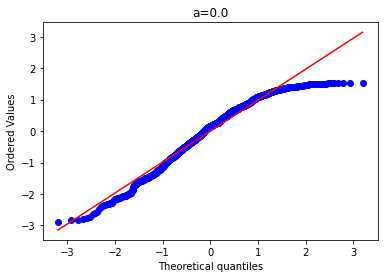

In [ ]:
x = stats.expon.rvs(0.5,size=1000)
ability_plot(x,0.0)

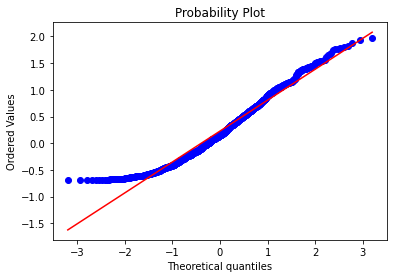

In [ ]:
logx = [ math.log(0.0000001+c) for c in x]
f = stats.probplot(logx, dist="norm", plot=pylab)

# Athletic prizemoney

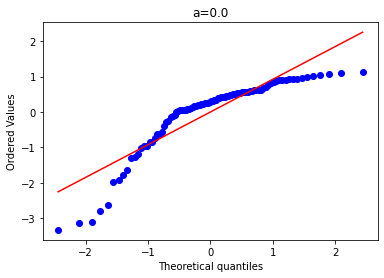

In [ ]:
athletes = pd.read_csv('https://raw.githubusercontent.com/ali-ce/datasets/master/Most-paid-athletes/Athletes.csv')
ability_plot(athletes['Total Pay'].replace('[\$,]', '', regex=True).astype(float),a=0.0)

# Global covid cases

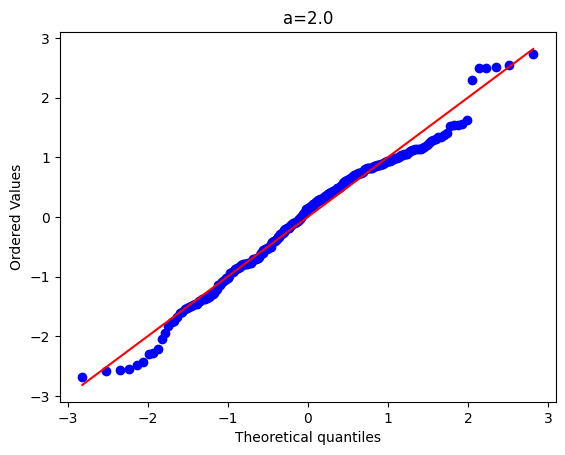

((array([-2.8162833 , -2.51831098, -2.34946357, -2.22907295, -2.13430748,
         -2.05554714, -1.98779149, -1.9280949 , -1.87457009, -1.8259323 ,
         -1.78126587, -1.73989421, -1.70130269, -1.66509035, -1.63093849,
         -1.5985894 , -1.56783161, -1.53848938, -1.51041497, -1.48348296,
         -1.45758594, -1.43263115, -1.40853793, -1.38523569, -1.36266225,
         -1.34076259, -1.31948771, -1.29879386, -1.27864172, -1.25899588,
         -1.2398243 , -1.2210979 , -1.20279019, -1.18487698, -1.16733612,
         -1.15014725, -1.13329166, -1.11675203, -1.1005124 , -1.08455793,
         -1.06887485, -1.05345036, -1.03827251, -1.02333016, -1.00861286,
         -0.99411084, -0.97981494, -0.96571654, -0.95180751, -0.93808023,
         -0.92452749, -0.91114246, -0.89791872, -0.88485016, -0.871931  ,
         -0.85915576, -0.84651922, -0.83401644, -0.82164268, -0.80939347,
         -0.79726451, -0.78525172, -0.7733512 , -0.76155921, -0.74987217,
         -0.73828667, -0.72679943, -0.

In [6]:
covid = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
vals = covid[covid.columns[-1]].values
ability_plot(vals,a=2.0)

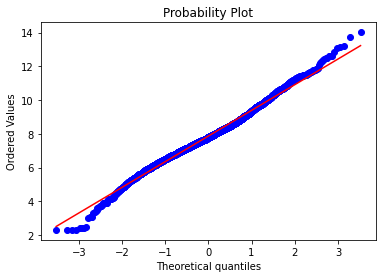

In [ ]:
tcases = [ math.log(10+c) for c in scases]
g = stats.probplot(tcases, dist="norm", plot=pylab)

# U.S. Covid by county

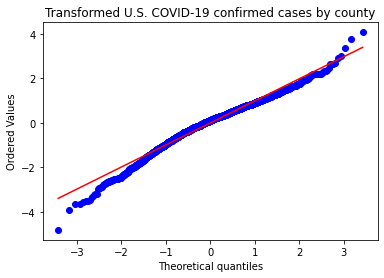

((array([-3.42043786, -3.17130311, -3.03322659, ...,  3.03322659,
          3.17130311,  3.42043786]),
  array([-4.80499264, -3.90938035, -3.6515304 , ...,  3.34053585,
          3.76429886,  4.06943268])),
 (0.9906891350231439, -1.0160425342890781e-16, 0.9893246556688093))

In [ ]:
counties = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/live/us-counties.csv')
ccases = [ c for c in sorted(counties['confirmed_cases'].values) if c>0 ]
ability_plot(ccases,a=0.0,title='Transformed U.S. COVID-19 confirmed cases by county')


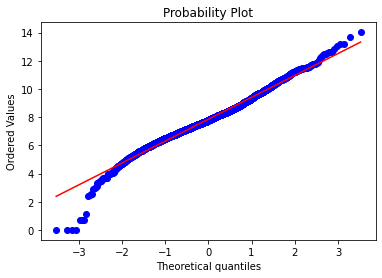

In [ ]:
tcases = [ math.log(1+c) for c in scases]
g =stats.probplot(tcases, dist="norm", plot=pylab)

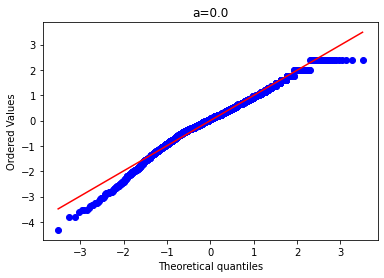

In [ ]:
sdeaths = sorted(counties['deaths'].values)
dths = [ d for d in sdeaths if d>0]
ability_plot(dths,a=0.0)

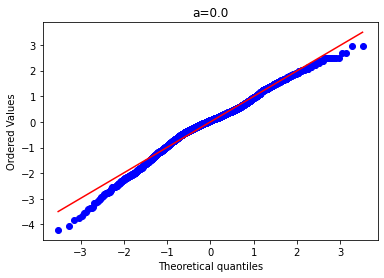

In [ ]:
county_density = pd.read_csv('https://raw.githubusercontent.com/camillol/cs424p3/master/data/Population-Density%20By%20County.csv')
sdensity = sorted(county_density['Density per square mile of land area'])
ability_plot(sdensity,a=0.0)


# City sizes

In [ ]:
city_sizes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv')

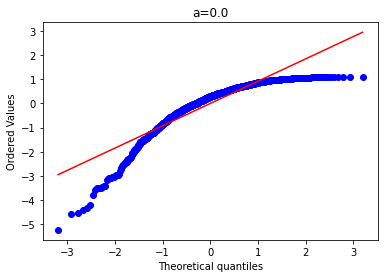

In [ ]:
ability_plot(city_sizes['Population'])
# Better fit by power law?

# Different COVID data from paper
.... that says its a power law

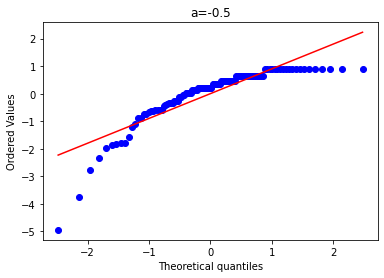

In [ ]:
covid_from_power_law = pd.read_csv('https://raw.githubusercontent.com/berndblasius/Covid19/master/data/time_series_19-covid-Deaths.csv')
sv = [ v for v in covid_from_power_law[covid_from_power_law.columns[-1]].values if v>1]
ability_plot(sv,-0.5)

# GDP / capita

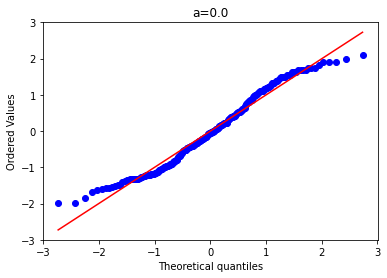

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/worldFactbook/GDPPerCapita.csv')
vals = df['GDP Per Capita']
ability_plot(vals,a=0.0)

# Laptops per country

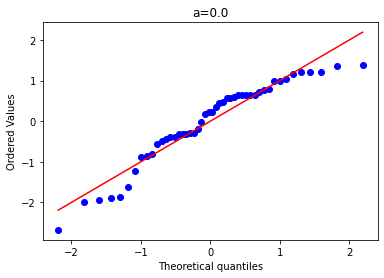

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/olpc/laptopsPerCountry.csv')
vals = df['count']
ability_plot(vals,a=0.0)

In [ ]:
# Linchings by state

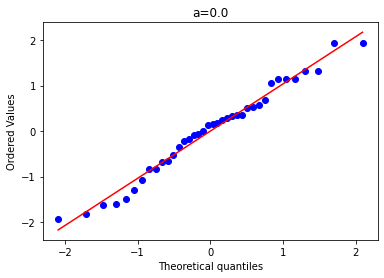

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/tuskegeeInstitute/lynchings-1882-1968-by-state-and-race.csv')
ability_plot(df['Total'])

# Migrants

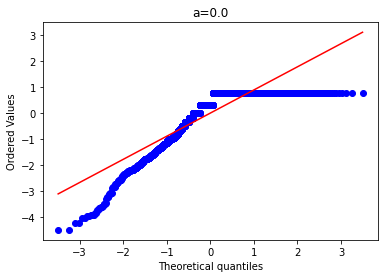

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/migrants/events.csv')
ability_plot(df['dead_and_missing'])

# Weed prices

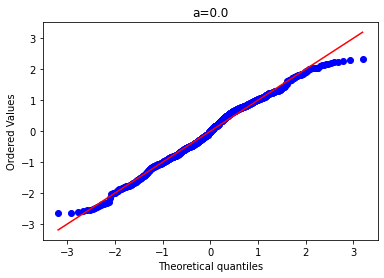

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/amitkaps/weed/Weed_Price.csv')
ability_plot(df['HighQN'][:1000],a=0.0)

# State populations

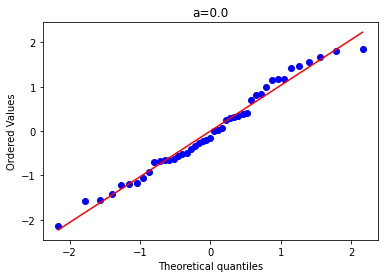

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/amitkaps/weed/Population_State.csv')
ability_plot(df['value'],a=0.0)

# Syrian violations

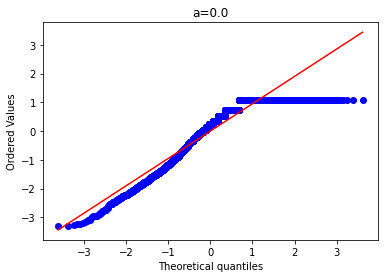

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/SyriaViolationsDocumentationCenter/dataAggregated.csv')
ability_plot(df['count'],a=0.0)

# Mortality causes

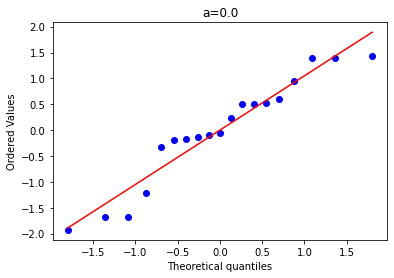

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/all/cdc_mortality_mortality_underyling_cause_by_years_simplified.csv')
ability_plot(df['1998'],a=0.0)

# Infant mortality

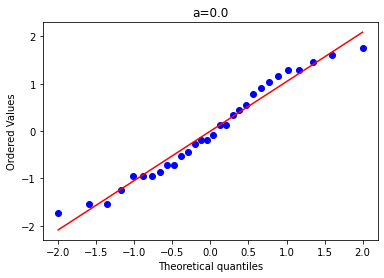

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/all/data.gov.in_infantMortalityRate_Infant_Mortality_Rate_1.csv')
ability_plot(df['2011'],a=0.0)

# Petals

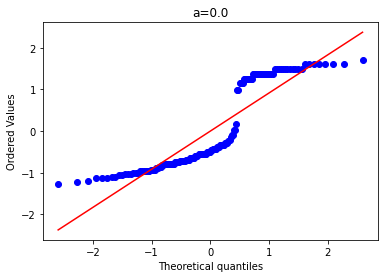

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/all/iris_iris.csv')
ability_plot(df['Petal Length'],a=0.0)

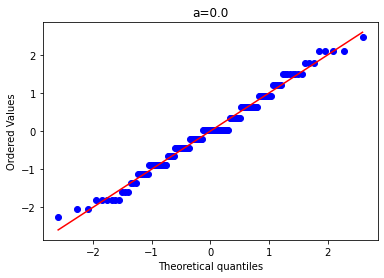

In [ ]:
ability_plot(df['Sepal Width'],a=0.0)

# More city populations

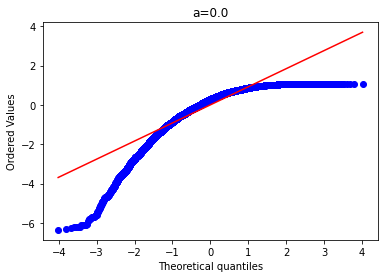

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/all/geonames_cities15000.csv')
ability_plot(df['population'],a=0.0)

# browser market share

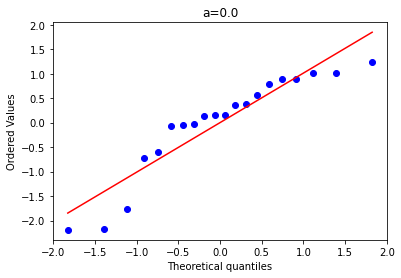

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/all/statCounter_currentBrowserMarketShares.csv')
ability_plot(df['marketShare'],a=0.0)

# Earthquake magnitudes

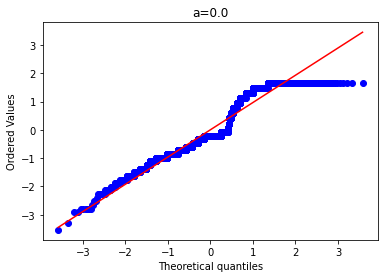

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/all/usgs_centennial_earthquakes.csv')
ability_plot(df['magnitude'][:4000],a=0.0)

#Prices

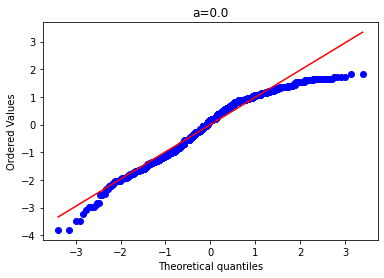

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/all/superstoreSales_superstoreSales.csv')
ability_plot(df['Unit Price'][:2000],a=0.)

# Christians by country

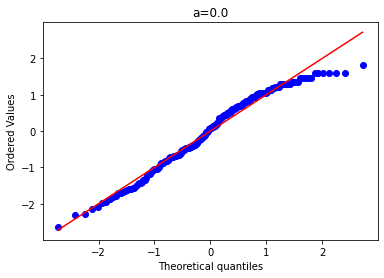

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/pew/religion/religionByCountry.csv')
ability_plot([float(v) for v in df['Christian'] if not '<' in v],a=0.0)

# Startups

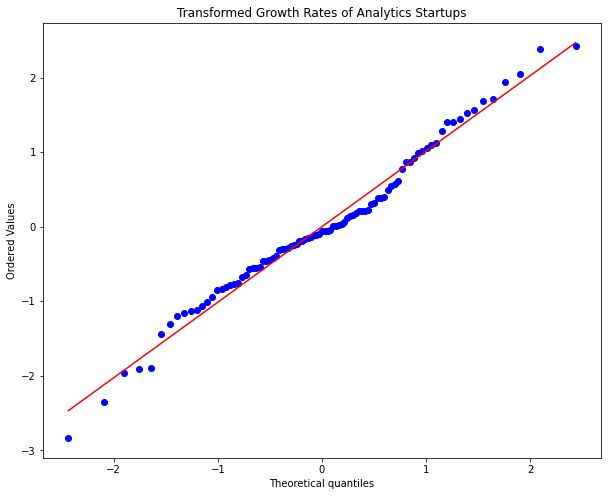

100

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/mattermark/2015-top-100-analytics-startups.csv')
plt.figure(figsize=(10,8))
ability_plot(df['Growth Score'],a=0.,title='Transformed Growth Rates of Analytics Startups')
len(df)

# Big data revenue

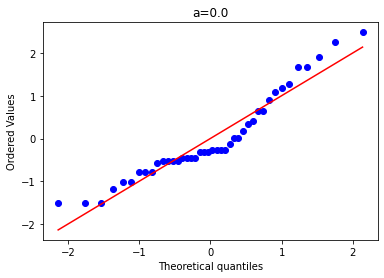

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/wikibon/revenueBigData2012.csv')
ability_plot(df['% Big Data Software Revenue'],a=0.0)

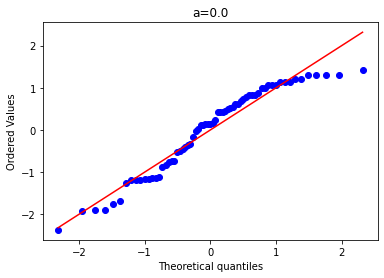

In [ ]:
ability_plot(df['Big Data Revenue'],a=0.0)

# War deaths

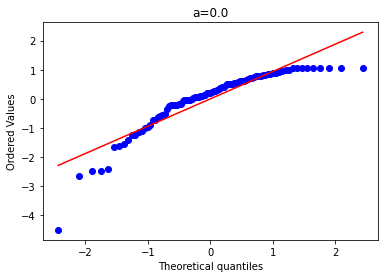

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/correlatesofwar/wars.csv')
ability_plot(df['batDeath'],a=0.0)

# Flu

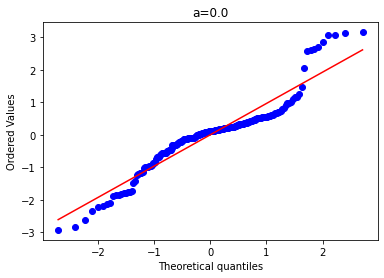

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/usda/avian_influenza/avian_flu_cleaned.csv')
ability_plot(df['Size'],a=0.0)

# Cars

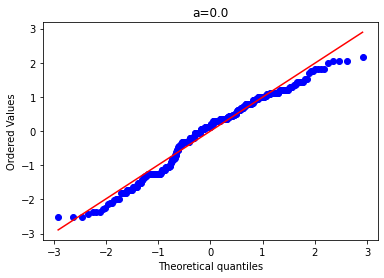

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/uci_ml/auto-mpg/auto-mpg.csv')
ability_plot(df['horsepower'],a=0.0)

# Abalone

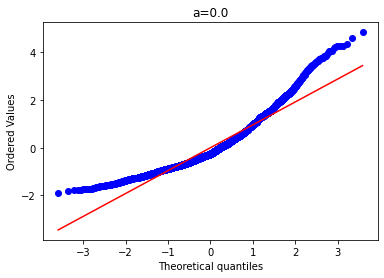

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/uci_ml/abalone/abalone.csv')
ability_plot(df['whole_weight'],a=0.0)

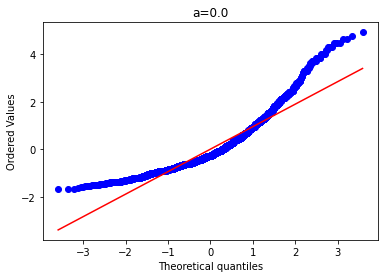

In [ ]:
ability_plot(df['diameter'],a=0.0)

# Synomyns


In [ ]:
!pip install PyDictionary
!pip install wordfreq

In [ ]:
from PyDictionary import PyDictionary
from wordfreq import word_frequency
dictionary = PyDictionary()

def synonym_plot(wd='mother',a=0.0):
  """  Ability plot of synomyns for any word
  """
  wd_synonyms = dictionary.synonym(wd)
  freqs = [ word_frequency(w,'en') for w in wd_synonyms]
  ability_plot(freqs,a=a,cull=0)

def synonym_logplot(wd='mother'):
  wd_synonyms = dictionary.synonym(wd)
  freqs = [ word_frequency(w,'en') for w in wd_synonyms]


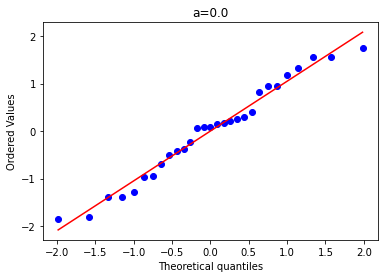

In [ ]:
synonym_plot('beautiful')

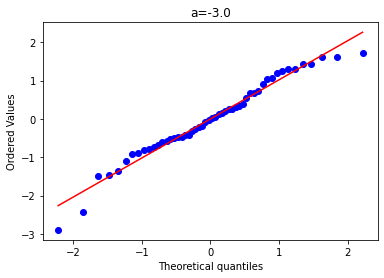

In [ ]:
synonym_plot('bright',a=-3.0)

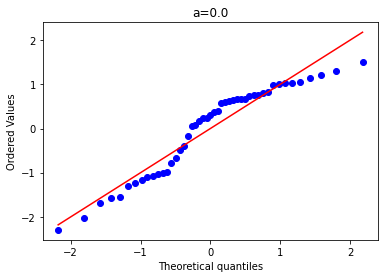

In [ ]:
synonym_plot('bad',a=0.0)

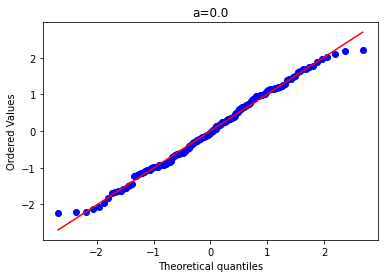

In [ ]:
synonym_plot('move',a=0.0)

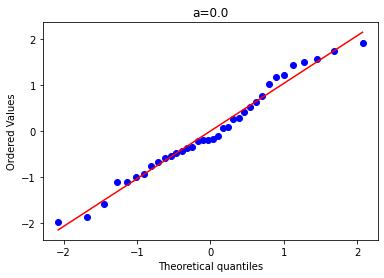

In [ ]:
synonym_plot('say',a=0.0)

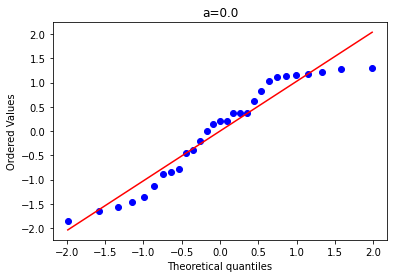

In [ ]:
synonym_plot('look',a=0.0)

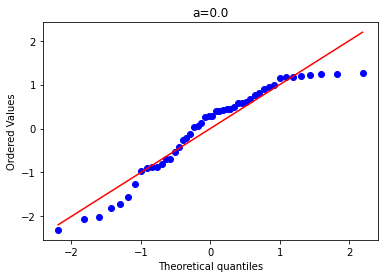

In [ ]:
synonym_plot('little',a=0.0)

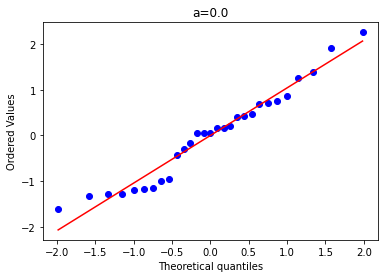

In [ ]:
synonym_plot('fear',a=0.0)

In [ ]:
# Surname frequencies

In [ ]:
def category_plot(category='cities',sub='united_states'):
  df = pd.read_csv('https://raw.githubusercontent.com/imsky/wordlists/master/names/CATEGORY/SUB.txt'.replace('CATEGORY',category).replace('SUB',sub))
  freqs = [ word_frequency(w,'en') for w in df[df.columns[0]].values ]
  ability_plot(freqs,cull=0)


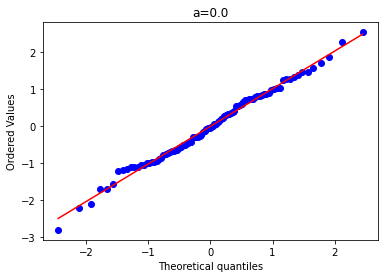

In [ ]:
category_plot('cities','united_states')

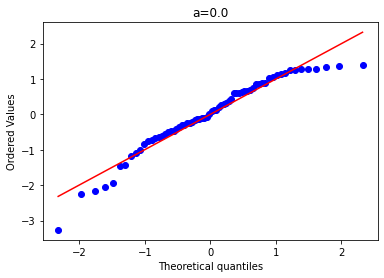

In [ ]:
category_plot('cities','france')

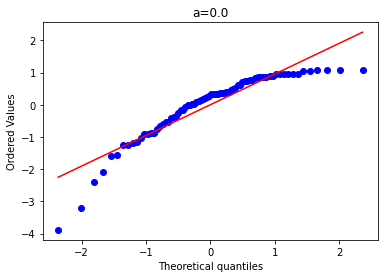

In [ ]:
category_plot('cities','netherlands')

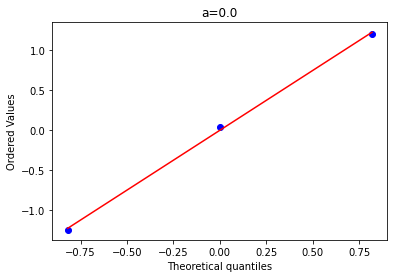

In [ ]:
category_plot('cities','canada')

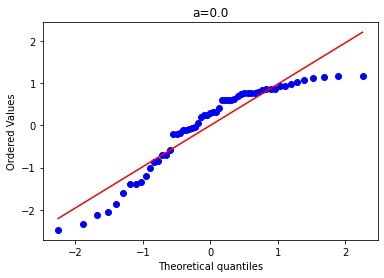

In [ ]:
category_plot('cities','switzerland')

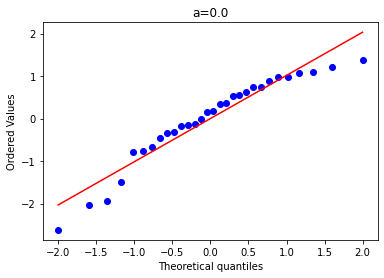

In [ ]:
category_plot('codenames','intel')

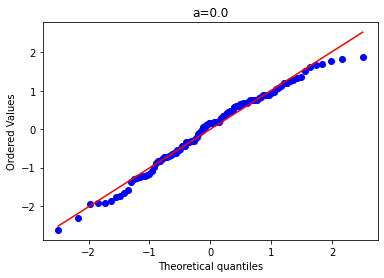

In [ ]:
category_plot('codenames','apple')

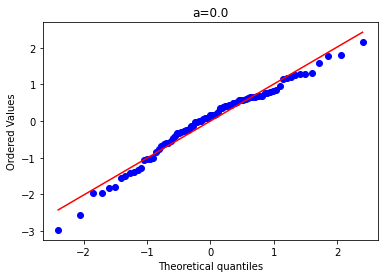

In [ ]:
category_plot('codenames','microsoft')

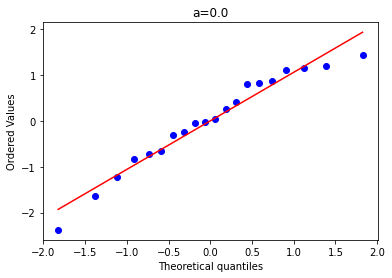

In [ ]:
category_plot('companies','unicorns')

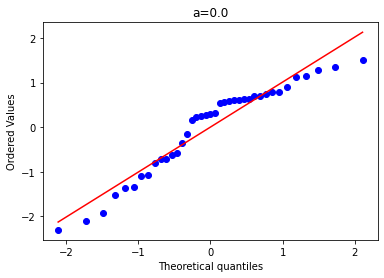

In [ ]:
category_plot('people','computing')

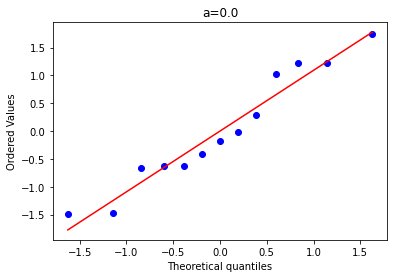

In [ ]:
category_plot('people','butlers')

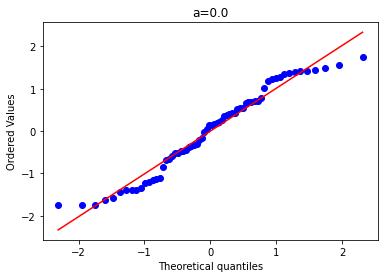

In [ ]:
category_plot('streets','newyork')

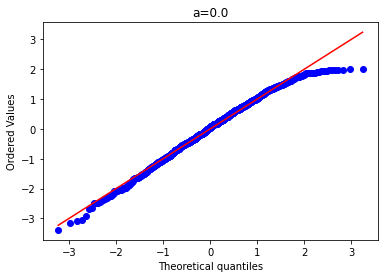

In [ ]:
category_plot('streets','chicago')

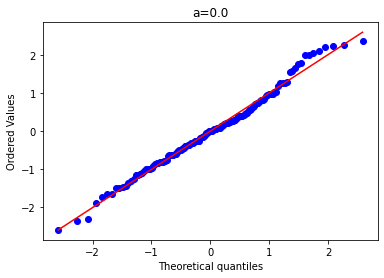

In [ ]:
category_plot('surnames','irish')

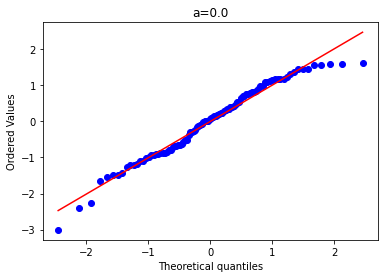

In [ ]:
category_plot('surnames','italian')

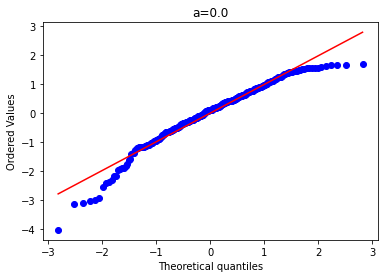

In [ ]:
category_plot('surnames','german')

# Trump votes

In [ ]:
!pip install benfordslaw

In [ ]:
from benfordslaw import benfordslaw
bl = benfordslaw(alpha=0.05)
df = bl.import_example(data='USA')
X = df['votes'].loc[df['candidate']=='Donald Trump'].values
ability_plot(X,a=0.0)

ModuleNotFoundError: ignored

In [ ]:
df

NameError: ignored

@misc{erdogant2020benfordslaw,
  title={benfordslaw},
  author={Erdogan Taskesen},
  year={2019},
  howpublished={\url{https://github.com/erdogant/benfordslaw}},
}

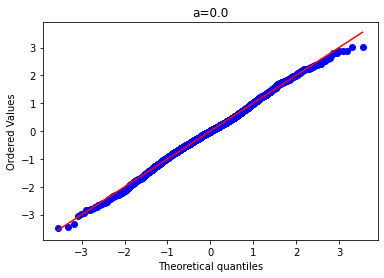

(0.0, 20000.0)

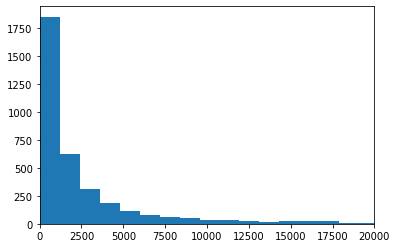

In [ ]:
f=plt.hist(X,bins=150)
plt.xlim([0,20000])

# Tweets

# References etc



https://statweb.stanford.edu/~owen/courses/306a/ZipfByHera.pdf



